## Winter Fashion Trends Analysis 

### Objectives:

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [156]:
df_raw_data=pd.read_csv('Winter_Fashion_Trends_Dataset.csv')
df_raw_data.head(10)

,ID,Brand,Category,Color,Material,Style,Gender,Season,Price(USD),Popularity_Score,Customer_Rating,Trend_Status
0,1,Adidas,Gloves,Brown,Polyester,Streetwear,Women,Winter 2025,244.06,6.0,4.9,Trending
1,2,Gucci,Gloves,Red,Leather,Sporty,Men,Winter 2023,366.73,8.8,3.3,Trending
2,3,H&M,Coat,Brown,Fleece,Streetwear,Unisex,Winter 2025,741.55,4.8,3.5,Trending
3,4,North Face,Coat,Blue,Cashmere,Formal,Men,Winter 2024,116.09,7.5,3.1,Outdated
4,5,Mango,Thermal,Blue,Cashmere,Formal,Unisex,Winter 2025,193.16,7.8,4.3,Outdated
5,6,Uniqlo,Thermal,Black,Fleece,Formal,Unisex,Winter 2025,699.85,1.7,4.2,Outdated
6,7,Uniqlo,Coat,Gray,Fleece,Casual,Men,Winter 2025,497.79,9.7,3.0,Trending
7,8,Mango,Sweater,Cream,Cotton,Streetwear,Unisex,Winter 2025,579.37,6.6,3.8,Outdated
8,9,Gucci,Gloves,Brown,Cotton,Casual,Unisex,Winter 2024,315.96,6.2,2.8,Outdated
9,10,Mango,Scarf,Maroon,Leather,Luxury,Unisex,Winter 2023,468.58,2.5,4.9,Classic


In [157]:
print(f'The shape of the data frame is{df_raw_data.shape}')
print(f'The data types within the data frame are{df_raw_data.dtypes}')
print(f'The data that is duplicated are {df_raw_data.duplicated().sum()}')

The shape of the data frame is(150, 12)
The data types within the data frame areID                    int64
Brand                object
Category             object
Color                object
Material             object
Style                object
Gender               object
Season               object
Price(USD)          float64
Popularity_Score    float64
Customer_Rating     float64
Trend_Status         object
dtype: object
The data that is duplicated are 0


#### Clean and preprocess data

In [158]:
df_raw_data.isnull().sum()

ID                  0
Brand               0
Category            0
Color               0
Material            0
Style               0
Gender              0
Season              0
Price(USD)          0
Popularity_Score    0
Customer_Rating     0
Trend_Status        0
dtype: int64

In [159]:
df_clean = df_raw_data.drop('ID', axis = 1)
float_cols = df_clean.select_dtypes(include=['float']).columns 
df_clean[float_cols] = df_clean[float_cols].round(2)#round to 2dp
df_clean['Season']=df_clean['Season'].map(lambda a: a.lstrip('Winter ') )
df_clean.rename(columns={'Season': 'Winter Season'}, inplace=True)
df_clean['Winter Season']=pd.to_datetime(df_clean['Winter Season'])
df_clean['Winter Season']=df_clean['Winter Season'].dt.year
print(f'The data types within the data frame are{df_clean.dtypes}')
df_clean.head(10) 

The data types within the data frame areBrand                object
Category             object
Color                object
Material             object
Style                object
Gender               object
Winter Season         int32
Price(USD)          float64
Popularity_Score    float64
Customer_Rating     float64
Trend_Status         object
dtype: object


,Brand,Category,Color,Material,Style,Gender,Winter Season,Price(USD),Popularity_Score,Customer_Rating,Trend_Status
0,Adidas,Gloves,Brown,Polyester,Streetwear,Women,2025,244.06,6.0,4.9,Trending
1,Gucci,Gloves,Red,Leather,Sporty,Men,2023,366.73,8.8,3.3,Trending
2,H&M,Coat,Brown,Fleece,Streetwear,Unisex,2025,741.55,4.8,3.5,Trending
3,North Face,Coat,Blue,Cashmere,Formal,Men,2024,116.09,7.5,3.1,Outdated
4,Mango,Thermal,Blue,Cashmere,Formal,Unisex,2025,193.16,7.8,4.3,Outdated
5,Uniqlo,Thermal,Black,Fleece,Formal,Unisex,2025,699.85,1.7,4.2,Outdated
6,Uniqlo,Coat,Gray,Fleece,Casual,Men,2025,497.79,9.7,3.0,Trending
7,Mango,Sweater,Cream,Cotton,Streetwear,Unisex,2025,579.37,6.6,3.8,Outdated
8,Gucci,Gloves,Brown,Cotton,Casual,Unisex,2024,315.96,6.2,2.8,Outdated
9,Mango,Scarf,Maroon,Leather,Luxury,Unisex,2023,468.58,2.5,4.9,Classic


## Exploritory Analysis 
### What winter clothing items have been 'popular' over the past three years?
#### And does a 'popular' item necessairly mean it's trending?

#### 1a.Data Transformation 

In [252]:
unique_category=df_clean['Category'].unique()
unique_category

array(['Gloves', 'Coat', 'Thermal', 'Sweater', 'Scarf', 'Beanie',
       'Cardigan', 'Jacket', 'Hoodie', 'Boots'], dtype=object)

In [280]:
df_heatmap_table = df_clean[['Brand','Category','Price(USD)']]
df_heatmap_table
df_heatmap_table=df_heatmap_table.groupby(by=['Brand','Category']).mean().round(2)
df_heatmap_table=pd.pivot_table(data=df_heatmap_table,
               index='Brand',
               columns='Category',
               values='Price(USD)').reset_index().rename_axis(mapper=None, axis=1)
df_heatmap_table.fillna(value=0)
df_heatmap_table.set_index('Brand',inplace=True)
df_heatmap_table

,Beanie,Boots,Cardigan,Coat,Gloves,Hoodie,Jacket,Scarf,Sweater,Thermal
Brand,,,,,,,,,,
Adidas,NaN,NaN,775.42,NaN,393.32,NaN,771.22,430.58,NaN,626.78
Gucci,548.71,NaN,NaN,134.66,313.03,513.28,NaN,586.29,432.93,530.44
H&M,557.13,NaN,NaN,741.55,276.86,547.76,512.12,512.48,197.04,389.24
Levi's,NaN,690.75,210.74,637.56,NaN,624.26,NaN,146.36,413.65,542.67
Mango,NaN,489.11,597.69,573.52,259.04,481.15,NaN,419.65,526.73,288.13
Nike,433.00,293.87,435.24,NaN,77.51,705.85,NaN,445.08,277.99,NaN
North Face,NaN,433.16,426.39,356.24,281.50,349.96,511.82,380.94,415.05,217.74
Prada,407.11,342.14,79.86,687.44,398.21,NaN,377.36,439.78,674.30,333.11
Uniqlo,629.22,NaN,NaN,622.56,706.80,632.49,404.43,329.53,644.97,603.92


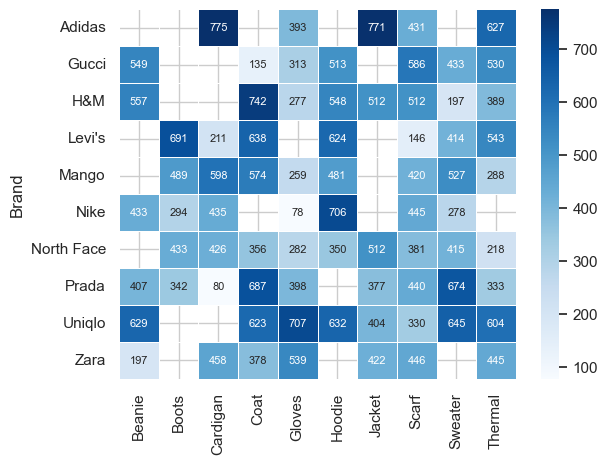

In [281]:
sns.set_theme(style="whitegrid")
sns.heatmap(data=df_heatmap_table, annot=True, linewidths=0.5, fmt=".0f",annot_kws={"size": 8},cmap='Blues')
plt.show()

In [317]:
col_list= df_heatmap_table.columns.tolist()
most_expensive_brand = {}  # dictionary to store index of max for each column
for i in col_list:
    most_expensive_brand[i] = df_heatmap_table[i].idxmax()  # get row index of max
most_expensive_brand
value_counts_brands = pd.Series(list(most_expensive_brand.values())).value_counts()
value_counts_brands


Adidas    3
Uniqlo    2
Levi's    1
H&M       1
Nike      1
Gucci     1
Prada     1
Name: count, dtype: int64

In [318]:
def detect_outliers_iqr(column, threshold=1.5):
    iqr = column.quantile(0.75) - column.quantile(0.25) #IQR
    lower_bound = column.quantile(0.25) - threshold * iqr
    upper_bound = column.quantile(0.75) + threshold * iqr
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

outliers = df_heatmap_table.apply(detect_outliers_iqr)
outliers
df_no_outliers = df_heatmap_table.mask(outliers)
df_no_outliers=df_no_outliers.fillna(value=0)
df_no_outliers

,Beanie,Boots,Cardigan,Coat,Gloves,Hoodie,Jacket,Scarf,Sweater,Thermal
Brand,,,,,,,,,,
Adidas,0.00,0.00,775.42,0.00,393.32,0.00,0.00,430.58,0.00,626.78
Gucci,548.71,0.00,0.00,134.66,313.03,513.28,0.00,0.00,432.93,530.44
H&M,557.13,0.00,0.00,741.55,276.86,547.76,512.12,512.48,197.04,389.24
Levi's,0.00,690.75,210.74,637.56,0.00,624.26,0.00,0.00,413.65,542.67
Mango,0.00,489.11,597.69,573.52,259.04,481.15,0.00,419.65,526.73,288.13
Nike,433.00,293.87,435.24,0.00,0.00,705.85,0.00,445.08,277.99,0.00
North Face,0.00,433.16,426.39,356.24,281.50,349.96,511.82,380.94,415.05,217.74
Prada,407.11,342.14,79.86,687.44,398.21,0.00,377.36,439.78,674.30,333.11
Uniqlo,629.22,0.00,0.00,622.56,0.00,632.49,404.43,329.53,644.97,603.92


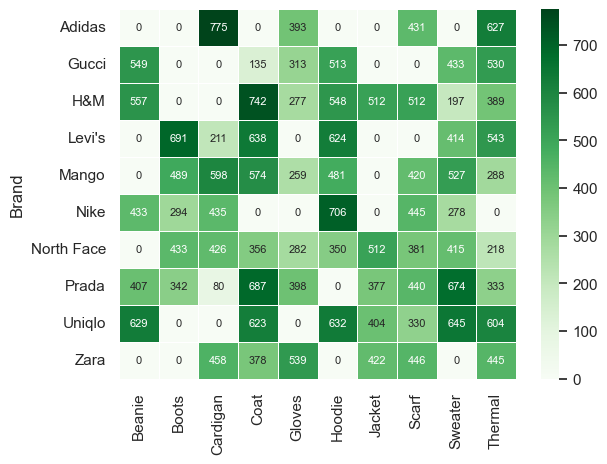

In [257]:
sns.set_theme(style="whitegrid")
sns.heatmap(data=df_no_outliers, annot=True, linewidths=0.5, fmt=".0f",annot_kws={"size": 8},cmap='Greens')
plt.show()

In [284]:
col_list= df_no_outliers.columns.tolist()
most_expensive_brand = {}  # dictionary to store index of max for each column
for i in col_list:
    most_expensive_brand[i] = df_no_outliers[i].idxmax()  # get row index of max
most_expensive_brand
value_counts_brands = pd.Series(list(most_expensive_brand.values())).value_counts()
value_counts_brands

H&M       3
Adidas    2
Uniqlo    1
Levi's    1
Zara      1
Nike      1
Prada     1
Name: count, dtype: int64

In [319]:
col_list_two= df_no_outliers.columns.tolist()
suggested_market_classification={}
df_no_outliers = df_no_outliers.replace(0, np.nan)
df_no_outliers
df_medians = df_no_outliers.median(numeric_only=True)
df_upper_quartile = df_no_outliers.quantile(0.75, numeric_only=True)
df_max_value=df_no_outliers.max(numeric_only=True)
df_upper_quartile

    

Beanie      557.130
Boots       489.110
Cardigan    527.965
Coat        650.030
Gloves      395.765
Hoodie      628.375
Jacket      511.820
Scarf       445.425
Sweater     556.290
Thermal     542.670
Name: 0.75, dtype: float64

In [320]:
def classify_value(value, col):
    if value >= df_upper_quartile[col]:
        return "High-End"
    elif value < df_upper_quartile[col] and value >= df_medians[col]:
        return "Mid-range"
    else:
        return "Basic Fashion"

# Apply classification to each column in the DataFrame
for col in df_no_outliers.columns:
    df_no_outliers[col] = df_no_outliers[col].apply(classify_value, col=col)

# Count the occurrences of each classification ("High-End", "Mid-range", "Basic Fashion") for each brand (row)
classification_counts = df_no_outliers.apply(pd.Series.value_counts, axis=1)
classification_counts



,Basic Fashion,High-End,Mid-range
Brand,,,
Adidas,7.0,2.0,1.0
Gucci,6.0,NaN,4.0
H&M,5.0,4.0,1.0
Levi's,6.0,2.0,2.0
Mango,7.0,2.0,1.0
Nike,7.0,1.0,2.0
North Face,8.0,1.0,1.0
Prada,6.0,3.0,1.0
Uniqlo,5.0,4.0,1.0


In [164]:
unique_brands=df_clean['Brand'].unique()
unique_brands


array(['Adidas', 'Gucci', 'H&M', 'North Face', 'Mango', 'Uniqlo', 'Zara',
       'Prada', "Levi's", 'Nike'], dtype=object)

In [220]:
def ClassificationMarketSegment(df_clean):
    df_clean['Market Segment']=df_clean.apply(
        lambda x: "High-End" if x['Brand'] in ["Gucci","Prada","Adidas"] else "Mid-range" if x['Brand'] in ["Nike","Levi's","Uniqlo","H&M"] else 'Basic Fashion',
        axis=1
    )
    return df_clean

# Apply function using pipe
df_clean = df_clean.pipe(ClassificationMarketSegment)
df_clean.head(10)

,Brand,Category,Color,Material,Style,Gender,Winter Season,Price(USD),Popularity_Score,Customer_Rating,Trend_Status,Market Segment
0,Adidas,Gloves,Brown,Polyester,Streetwear,Women,2025,244.06,6.0,4.9,Trending,High-End
1,Gucci,Gloves,Red,Leather,Sporty,Men,2023,366.73,8.8,3.3,Trending,High-End
2,H&M,Coat,Brown,Fleece,Streetwear,Unisex,2025,741.55,4.8,3.5,Trending,Mid-range
3,North Face,Coat,Blue,Cashmere,Formal,Men,2024,116.09,7.5,3.1,Outdated,Basic Fashion
4,Mango,Thermal,Blue,Cashmere,Formal,Unisex,2025,193.16,7.8,4.3,Outdated,Basic Fashion
5,Uniqlo,Thermal,Black,Fleece,Formal,Unisex,2025,699.85,1.7,4.2,Outdated,Mid-range
6,Uniqlo,Coat,Gray,Fleece,Casual,Men,2025,497.79,9.7,3.0,Trending,Mid-range
7,Mango,Sweater,Cream,Cotton,Streetwear,Unisex,2025,579.37,6.6,3.8,Outdated,Basic Fashion
8,Gucci,Gloves,Brown,Cotton,Casual,Unisex,2024,315.96,6.2,2.8,Outdated,High-End
9,Mango,Scarf,Maroon,Leather,Luxury,Unisex,2023,468.58,2.5,4.9,Classic,Basic Fashion


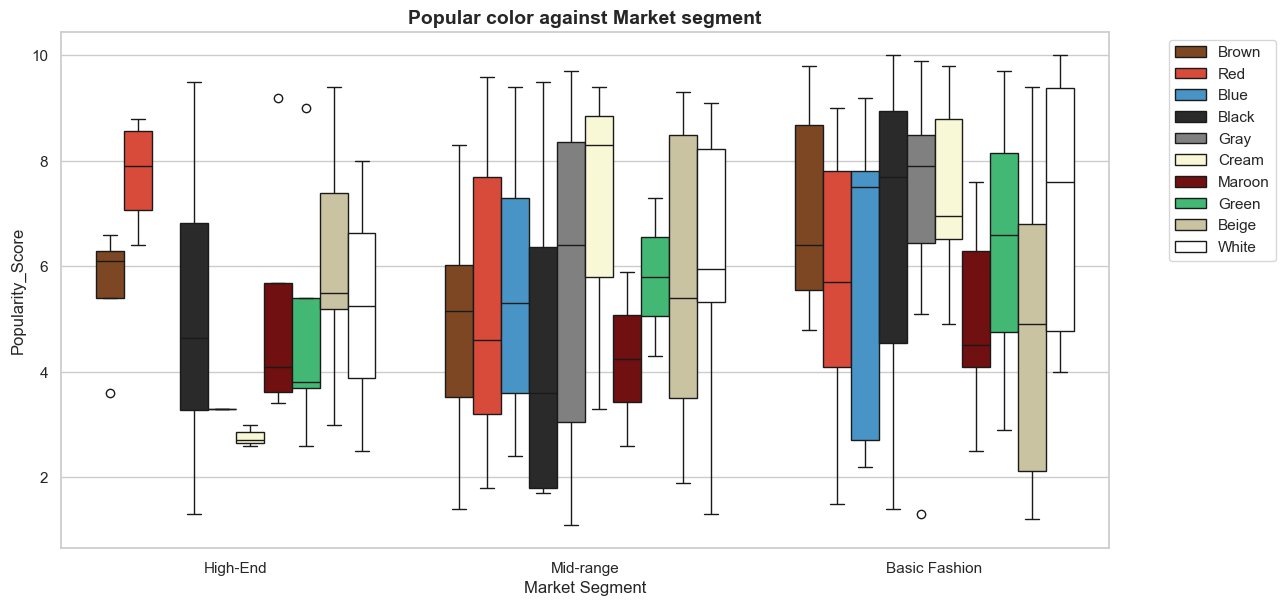

In [221]:
palette_dict = {
    "Brown": "#8B4513",
    "Red": "#f23621",
    "Blue": "#3498db",
    "Black": "#2B2A2A",
    "Gray": "#808080",
    "Cream": "#FFFDD0",
    "Maroon": "#800000",
    "Green": "#2ecc71",
    "Beige": "#D0C79B",
    "White": "#FFFFFF"
}
plt.figure(figsize=(13, 6))
sns.boxplot(data=df_clean, x="Market Segment", y="Popularity_Score", hue="Color",palette=palette_dict, order=["High-End", "Mid-range", "Basic Fashion"])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title("Popular color against Market segment", fontsize=14, fontweight='bold')
plt.show()

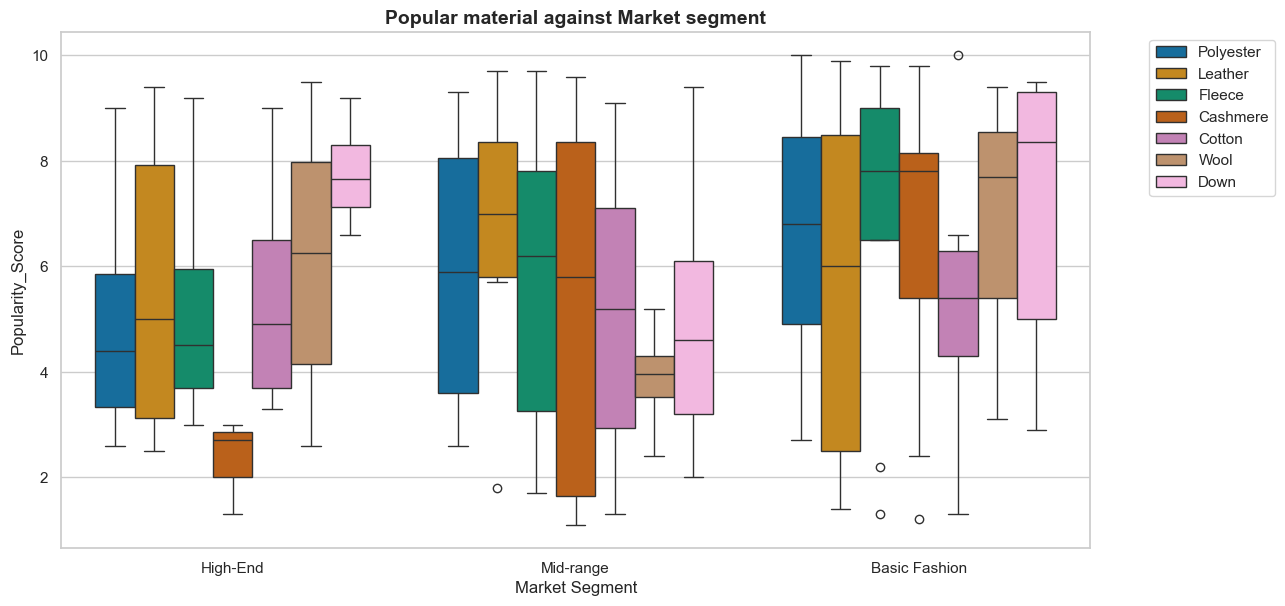

In [222]:
plt.figure(figsize=(13, 6))
sns.boxplot(data=df_clean, x="Market Segment", y="Popularity_Score", hue="Material",palette='colorblind', order=["High-End", "Mid-range", "Basic Fashion"])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title("Popular material against Market segment", fontsize=14, fontweight='bold')
plt.show()

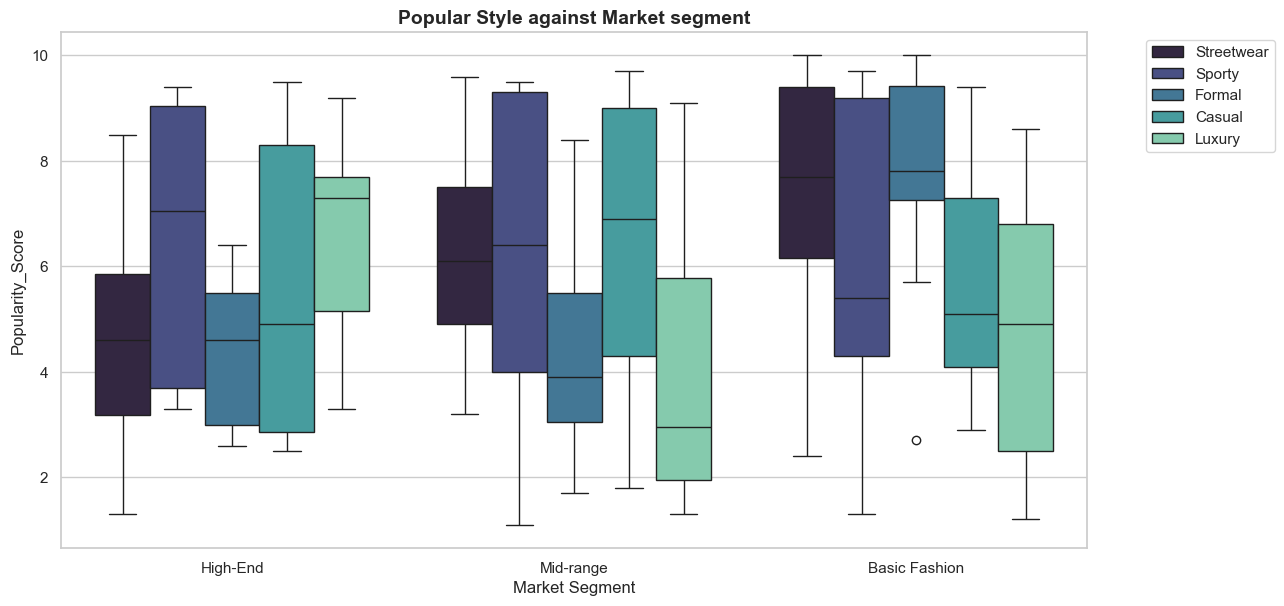

In [223]:
plt.figure(figsize=(13, 6))
sns.boxplot(data=df_clean, x="Market Segment", y="Popularity_Score", hue="Style",palette='mako', order=["High-End", "Mid-range", "Basic Fashion"])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.title("Popular Style against Market segment", fontsize=14, fontweight='bold')
plt.show()

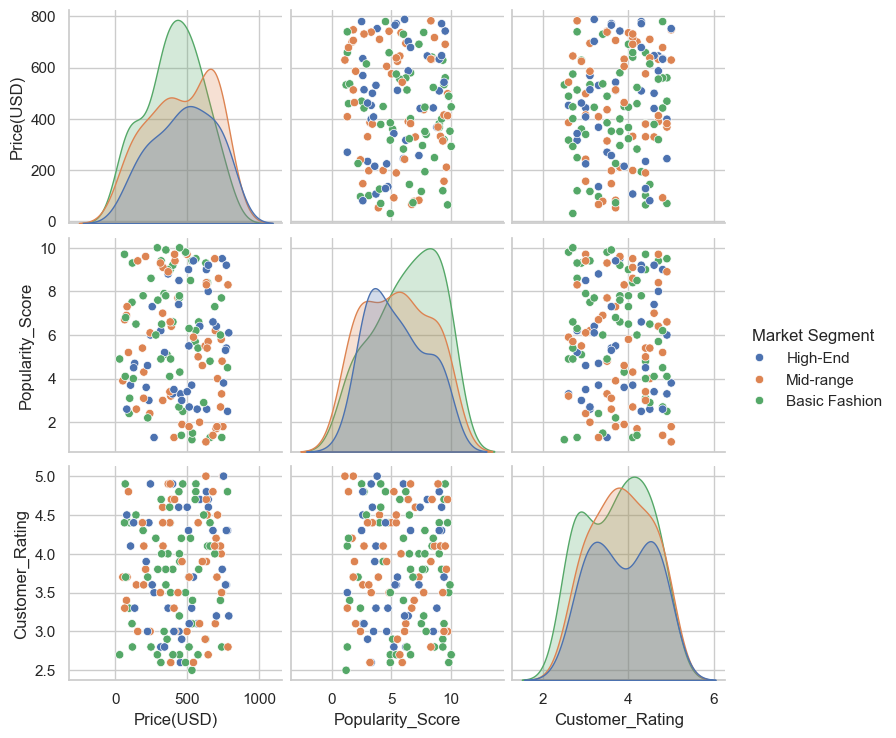

In [324]:
compare_correlation_pairplot=sns.pairplot(
    df_clean,
    x_vars=["Price(USD)", "Popularity_Score", "Customer_Rating"],
    y_vars=["Price(USD)", "Popularity_Score", "Customer_Rating"],
    hue="Market Segment"
)
plt.show()

In [230]:
df_clean[["Price(USD)", "Popularity_Score", "Customer_Rating"]].corr()


,Price(USD),Popularity_Score,Customer_Rating
Price(USD),1.000000,-0.039230,0.077361
Popularity_Score,-0.039230,1.000000,-0.077262
Customer_Rating,0.077361,-0.077262,1.000000


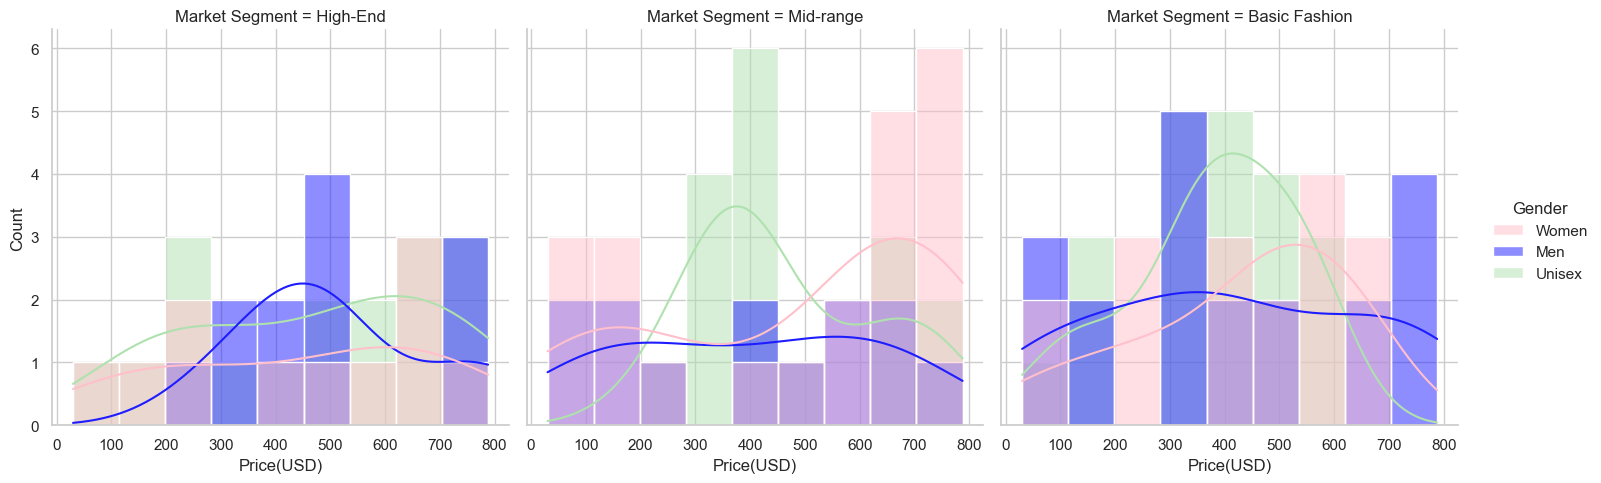

In [328]:
palette_dict_gender={"Women":"#FFC0CB",
                     "Men":"#1D1DFF",
                     "Unisex":"#AFE1AF"}
gender_vs_price_graph=sns.displot(data=df_clean, kde=True, x='Price(USD)', hue='Gender', col='Market Segment',palette=palette_dict_gender)
plt.show()

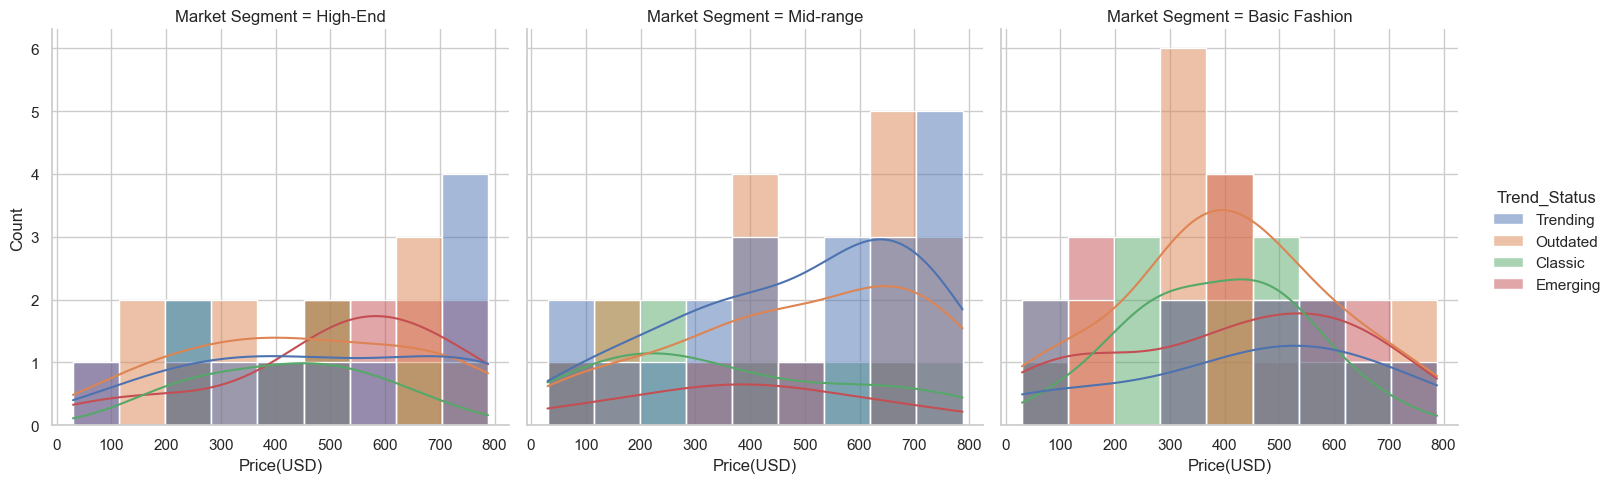

In [329]:
trend_status_vs_price_graph=sns.displot(data=df_clean, kde=True, x='Price(USD)', hue='Trend_Status', col='Market Segment')
plt.show()